# Index

1. [Analysing the dataset](#Analysing-the-dataset)
    1. [Missing Values](#Missing-Values)
    1. [Distribution of Disease Types](#Distribution-of-Disease-Types)
    1. [Features by Type](#Features-by-Type)
    1. [Data Correlation](#Data-correlation)
1. [Improving the dataset](#Improving-the-dataset)
1. [Data Labeling & Encoding](#Data-labeling-&-encoding)
1. [Algorithms](#Algorithms)
    1. [Random Forest](#Random-Forest)
    1. [SVM](SVM)
    1. [K-NN](K-NN)

# The Problem
This data set is based on the mayo clinic site: https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/covid-19-cold-flu-and-allergies-differences/art-20503981.  
The objective of this project is to predict which of the following diseases a patient has: Cold, Flue, Alergies or Covid-19

# Config
If there are any algorithms you would like to turn off from our project, please change the following flags:

In [1]:
OVERFIT = False
GRID_SEARCH = False
CROSS_VALIDATION = True

F_GRID_DIR = 'notebook_data/grid_search/'
F_OVERFIT_DIR = 'notebook_data/overfit/'

# Analysing the dataset

First of all, lets read the data into a panda dataframe: 

In [2]:
from IPython.display import Image
import pandas as pd

symptom_data = pd.read_csv('covid-symptoms.csv')
symptom_data.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


Since the data seems to be in readable format we don't need to make any changes to the csv file.  
Because of this we can immediately start working on making it better.

## Missing Values

After a quick check of the csv file we did not find any missing values. To guarantee it however, we search the dataframe for any null/nan value.

In [3]:
symptom_data.isnull().values.any()

False

Since the result came out as "False", now we are certain there are no missing values.

## Data Statistics

Let's begin analysing the statistics of the given data.

In [4]:
symptom_data.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribution of Disease Types

In this section we will see how much of each type of disease we have for each one so we can take measures if needed.

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [6]:
data_distribution = symptom_data.groupby(by=['TYPE']).count()
data_distribution

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
TYPE,,,,,,,,,,,,,,,,,,,,
ALLERGY,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381
COLD,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
COVID,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
FLU,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000


Just by annalysing the table we can see some discrepancies on the number of data we have for each type.  
To make it easier to visualize, let's represent it in a bar graph. 

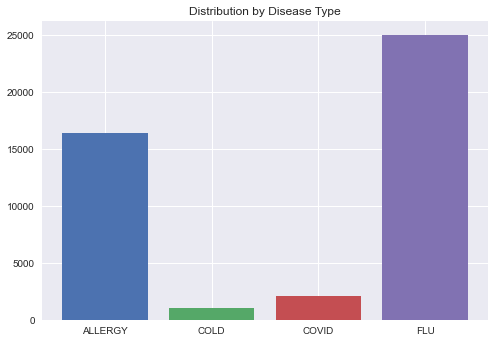

In [7]:
fig, ax = plt.subplots()

ax.set_title('Distribution by Disease Type')

ax.bar('ALLERGY', data_distribution.loc['ALLERGY', 'FEVER'])
ax.bar('COLD', data_distribution.loc['COLD', 'FEVER'])
ax.bar('COVID', data_distribution.loc['COVID', 'FEVER'])
ax.bar('FLU', data_distribution.loc['FLU', 'FEVER'])
del data_distribution

From what we can see from the graph, we have a very imbalanced dataset.  
Because of this we need to take the proper actions in order to get the best result possible. We decided to apply a technique called "smote". Smote works by using the KNN algorithm to create synthetic data. With this we can balance the amount of data we have for each type of disease when using the training set to fit a classifier. On top of this, we will also use a stratified split in order to guarantee we have some data from each disease in the training set.

## Data correlation

In [8]:
symptom_data.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


From the correlation matrix we cannot conclude any relevant relationship between features.

## Features by Type

In [9]:
import math

def plot_bars(symptom_data: pd.DataFrame):
    features = list(symptom_data.columns)
    features.remove('TYPE')

    types = symptom_data['TYPE'].unique()

    cols = math.ceil(math.sqrt(len(features)))
    rows = math.ceil(len(features) / cols)
    fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(cols * 2.5, rows * 2.5))

    labels = {
        'COVID': 'C-19',
        'FLU': 'FLU',
        'ALLERGY': 'ALR',
        'COLD': 'COLD',
    }

    for i in range(len(features)):
        ax = axs[i % rows][i // rows]

        for disease in types:
            disease_df = symptom_data.loc[symptom_data['TYPE']==disease]
            total_disease = disease_df['TYPE'].count()
            with_feature = disease_df.loc[disease_df[features[i]] == 1, 'TYPE'].count()

            ax.bar([labels[disease]], [with_feature / total_disease])

        ax.set_ylim(0, 1)
        ax.set_title(features[i])

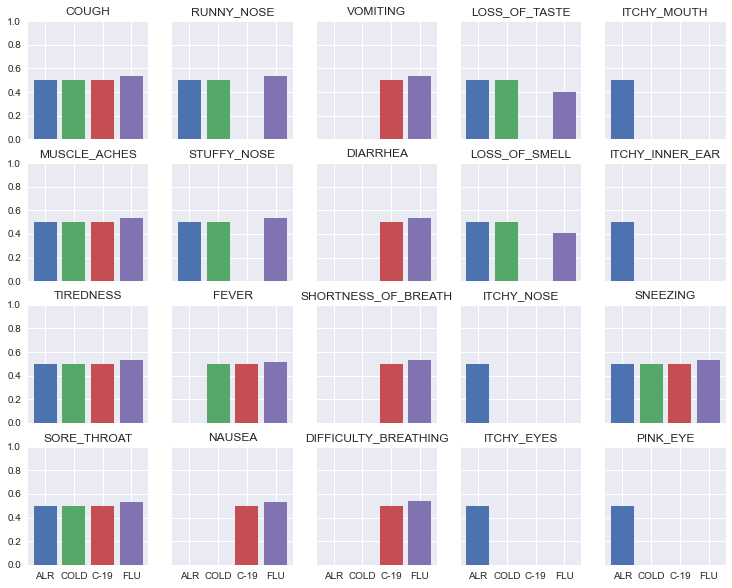

In [10]:
plot_bars(symptom_data)

These graph shows the amount of positive features by type.  
Just by analysing these graph we can already see some features that need improvements.

## Improving the data set

From the information gathered above, we merged many features, using the `any` method, as it works as a psuedo-or operator between the different values. For example we united all the itches into one unique feature.

In [11]:
symptom_data['ITCH'] = symptom_data[['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']].any(axis='columns')
symptom_data.drop(columns=['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE'], inplace=True);

symptom_data['SENSE_LOSS'] = symptom_data[['LOSS_OF_TASTE', 'LOSS_OF_SMELL']].any(axis='columns')
symptom_data.drop(columns=['LOSS_OF_TASTE', 'LOSS_OF_SMELL'], inplace=True);

symptom_data['NOSE_PROBLEMS'] = symptom_data[['RUNNY_NOSE', 'STUFFY_NOSE']].any(axis='columns')
symptom_data.drop(columns=['RUNNY_NOSE', 'STUFFY_NOSE'], inplace=True);

symptom_data['GASTRO_PROBLEMS'] = symptom_data[['DIARRHEA', 'NAUSEA', 'VOMITING']].any(axis='columns')
symptom_data.drop(columns=['DIARRHEA', 'NAUSEA', 'VOMITING'], inplace=True);

symptom_data['BREATHING_PROBLEMS'] = symptom_data[['SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']].any(axis='columns')
symptom_data.drop(columns=['SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING'], inplace=True);

We then dropped other features entirely, as was the case with the COUGH, MUSCLE_ACHE, TIREDNESS, SORE_THROAT and SNEEZING columns.

These columns were very similar and all displayed a roughly equal distribution. Since these columns had around 50% distribution of 0 and 1's we found them to not be very useful for our study.

In [12]:
symptom_data.drop(columns=['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'SNEEZING'], inplace=True)

In [13]:
# Reorder the TYPE column to end for consistency
type_series = symptom_data['TYPE']
symptom_data = symptom_data.drop(columns=['TYPE'])
symptom_data['TYPE'] = type_series

In [14]:
symptom_data.head()

,FEVER,ITCH,SENSE_LOSS,NOSE_PROBLEMS,GASTRO_PROBLEMS,BREATHING_PROBLEMS,TYPE
0,0,True,True,True,False,False,ALLERGY
1,0,True,True,False,False,False,ALLERGY
2,0,True,True,False,False,False,ALLERGY
3,0,True,True,True,False,False,ALLERGY
4,0,True,True,True,False,False,ALLERGY


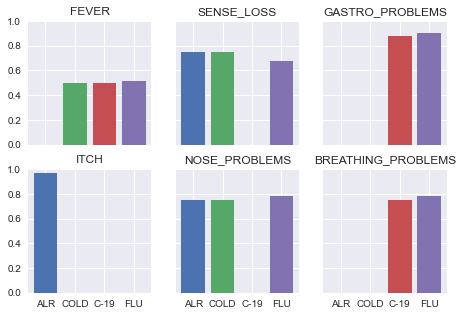

In [15]:
plot_bars(symptom_data)

With these changes we managed to get a much cleaner data set that provides us with other useful informations.  
For example, from this cleaned up dataset we can see that 100% of the people with alergies have some kind of itch, while noone else has any sort of itch.

# Data labeling & encoding  
  
Label encoding refers to the process of turning the labels into numbers, making it easier for the machine to read them. With this change to the labels the algorithms will also provide us with better results.  
We decided to use label encoding instead of one-hot encoding as we only need one column for the results.

In [16]:
from sklearn.preprocessing import LabelEncoder
disease_types = ('ALLERGY','COLD','COVID','FLU')
types_label = pd.DataFrame(symptom_data, columns=['TYPE'])

labelencoder = LabelEncoder()  # creating instance of labelencoder

symptom_data['TYPE_LABELED'] = labelencoder.fit_transform(symptom_data['TYPE'])    # Assigning numerical values and storing in another column

In [17]:
# We can extract the data in this format from pandas like this:
inputs = symptom_data[symptom_data.columns.difference(['TYPE', 'TYPE_LABELED'], sort=False)].values

# Similarly, we can extract the class labels
labels = symptom_data['TYPE_LABELED'].values


With this, the encoding is as follows:
 - Allergy : 0
 - Cold : 1
 - Covid-19 : 2
 - Flu : 3

# Classifier Evaluation

This is the function used in a simple train/test of an algorithm.  
This function receives a classifier to be used as well as other parameters and uses a template to aplly those parameters to the classifier.  We also let the user decide the number of splits we do to the data in order to perform a cross validation.  
Finnaly, since out dataset is not balanced (the Cold label has 1024 entries while the Flu label has 25000), we also have a flag to perform a "smote" operation to our dataset, thus balancing out these labels. On top of that, we also apply a Stratified Shuffle Split in order to guarantee there are the same proportions of data for each label.  
We also tried doing undersampling, however the results did not change and because of that we decided to stick to only "smote".

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from collections import Counter

# (training_inputs,
#  testing_inputs,
#  training_classes,
#  testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

def evaluate(inputs, labels, classifier, n_splits=5, smote=True, showTable = True):

    sss = StratifiedShuffleSplit(n_splits = n_splits , test_size=0.5, random_state=0)
    sss.get_n_splits(inputs, labels)

    scoresTest = []
    scoresTrain = []
    

    for train_index, test_index in sss.split(inputs, labels):

        X_train, X_test = inputs[train_index], inputs[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        if smote:
            X_train, y_train = SMOTE(random_state=0).fit_resample(X_train, y_train)
            # print(sorted(Counter(labels_resampled).items()))

        # if undersampling:
        #     X_train, y_train = TomekLinks().fit_resample(X_train, y_train)


        classifier.fit(X_train, y_train)

        predTest = classifier.predict(X_test)
        
        scoresTest.append(metrics.f1_score(y_test, predTest, average='weighted'))

        if(showTable):
            print(metrics.classification_report(y_test,predTest))
            showTable = False

    # Returns scores0 average
    return sum(scoresTest) / len(scoresTest)

# Algorithms

We are now going to start applying three different algorithms to our dataset. These algorithms are: Random Forest, KNN and SVM.

## Random Forest

The algorithm we first applied is the Random Forest algorithm. This algorithm consists of many different decision trees. It uses process like bagging and random selection when creating the various decision trees to try to not create the exact same trees. Because of these, the results are normally better than only one decision tree, and thus we decided to apply this algorithm instead of a single decision tree.

In [19]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

def random_forest(inputs, labels, smote=True):
    # Create the classifier
    random_forest_classifier = RandomForestClassifier()

    results = evaluate(inputs, labels, random_forest_classifier, smote=smote)

    return results

In [20]:
results_RF = random_forest(inputs, labels)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8191
           1       0.49      1.00      0.66       512
           2       0.51      0.97      0.67      1024
           3       1.00      0.91      0.95     12500

    accuracy                           0.93     22227
   macro avg       0.75      0.96      0.82     22227
weighted avg       0.97      0.93      0.94     22227



In [21]:
results_RF_NoSmote = random_forest(inputs, labels, smote=False)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8191
           1       0.49      0.89      0.63       512
           2       0.48      0.40      0.44      1024
           3       0.95      0.95      0.95     12500

    accuracy                           0.93     22227
   macro avg       0.73      0.80      0.75     22227
weighted avg       0.94      0.93      0.93     22227



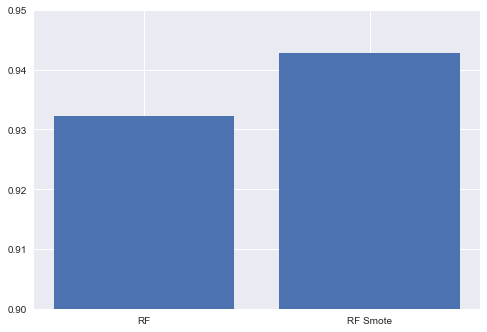

In [22]:
plt.bar(
    ['RF', 'RF Smote'],
    [results_RF_NoSmote, results_RF]
)
plt.ylim(.9, .95);

Our model is reaching an f1_score (in relation to weighted avg as our data is unbalanced) of around 0.94, which is very good!  
There is a drop in the f1_score for both labels 1 and 2 which is expected as they have very little data when compared to the other two labels.  
Although the results are good, we need to be sure of what we are doing. Thats why we need to make some more tests to the dataset to be able to claim this.

## Check for overfitting

Some times, due to how data is handled we can have cases of overfitting wich is when the classifier only learnt how to classify the training data and not the test data, so we need to verify if this is happening in our dataset.

In [23]:
def checkOverFit(all_inputs, all_labels):
    model_accuracies = []
    model_precision = []

    for repetition in range(1000):
        (training_inputs,
        testing_inputs,
        training_classes,
        testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
        
        random_forest_classifier = RandomForestClassifier()
        random_forest_classifier.fit(training_inputs, training_classes)
        classifier_accuracy = random_forest_classifier.score(testing_inputs, testing_classes)
        model_accuracies.append(classifier_accuracy)

    plt.hist(model_accuracies)
    plt.savefig(F_OVERFIT_DIR +  'rf_hist.png')

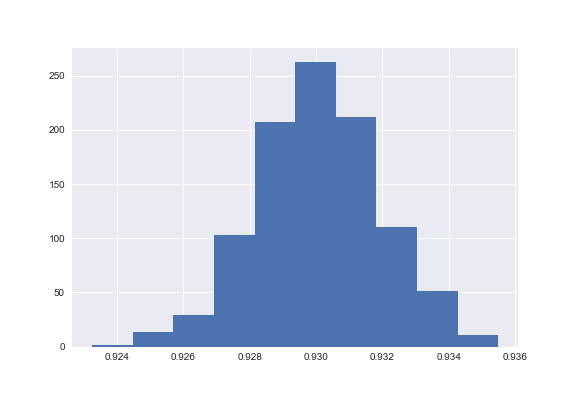

In [24]:
if OVERFIT:
    checkOverFit(inputs, labels)
else:
    display(Image(filename=F_OVERFIT_DIR + 'rf_hist.png'))

From what we can see on the graph, out of 1000 iterations, there is a maximum of 0.01 difference in the accuracy of the predictions.
Because of this, we can claim that our classifiers are not overfit and we can proceed in doing more tests using different algorithms, without needing to make any adjustment to the data.

## SVM
A support-vetor machine maps the data it receives into a space where the gap between labels is maximized. After creating this space, the testing data is also placed into it, and depending on which side it falls, thats the prediction the algorithm will give.

In [25]:
from sklearn import svm

clf = svm.SVC()

results_SVM = evaluate(inputs, labels, clf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8191
           1       0.49      1.00      0.66       512
           2       0.51      0.97      0.67      1024
           3       1.00      0.91      0.95     12500

    accuracy                           0.93     22227
   macro avg       0.75      0.96      0.82     22227
weighted avg       0.97      0.93      0.94     22227



In [26]:
print(results_SVM)

0.9428567943802705


The results obtained form the SVM, when compared with the result of the Random Forest are a bit underwhelming.  
Let's try some other parameters to see if we can fix this.

In [27]:
clf_withoutSmote = svm.SVC(kernel='sigmoid')

results_SVM_NoSmote = evaluate(inputs, labels, clf_withoutSmote, smote=False)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8191
           1       0.67      0.38      0.49       512
           2       0.52      0.33      0.41      1024
           3       0.93      0.97      0.95     12500

    accuracy                           0.93     22227
   macro avg       0.77      0.67      0.71     22227
weighted avg       0.92      0.93      0.92     22227



In [28]:
print(results_SVM_NoSmote)

0.924101026395385


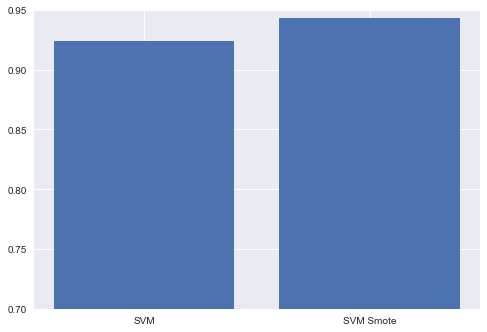

In [29]:
plt.bar(
    ['SVM', 'SVM Smote'],
    [results_SVM_NoSmote, results_SVM]
)
plt.ylim(.7, .95);

Apparently, when using the SVM algorithm we get better results if we do not adjust the number of data we have (do not apply smote to the training set). This was unnexpected so we have to keep this in mind goind forward.

## K-NN

K-Nearest Neighbour is a very simple machine learning algorithm. It calculates the simmilarity between the new data (test set) and the data used to train it, placing the new data in the label that is the most simmilar to it.  
It is also called the lazy learning algorithm as it does not learn anything during the training phase, it only stores data to compare to later.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(inputs, labels, n_neighbors = None, smote=True):
    if(n_neighbors == None):
        n_neighbors = math.floor(math.sqrt(len(inputs)/2))

    neigh = KNeighborsClassifier(n_neighbors)
    
    results_KNN = evaluate(inputs, labels, neigh, smote=smote)

    return results_KNN


In [31]:
results_KNN = KNN(inputs, labels)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8191
           1       0.53      0.71      0.61       512
           2       0.50      0.52      0.51      1024
           3       0.96      0.94      0.95     12500

    accuracy                           0.93     22227
   macro avg       0.74      0.79      0.76     22227
weighted avg       0.94      0.93      0.93     22227



With smote we obtained good values for this algorithm, however without smote we get slightly better results.

In [32]:
results_KNN_NoSmote = KNN(inputs, labels, smote=False)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8191
           1       0.56      0.67      0.61       512
           2       0.50      0.73      0.59      1024
           3       0.96      0.93      0.95     12500

    accuracy                           0.93     22227
   macro avg       0.75      0.83      0.78     22227
weighted avg       0.94      0.93      0.94     22227



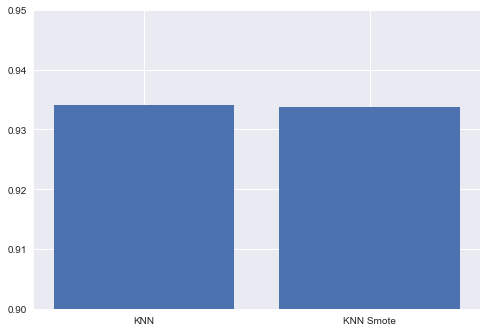

In [33]:
plt.bar(
    ['KNN', 'KNN Smote'],
    [results_KNN_NoSmote, results_KNN]
)
plt.ylim(.9, .95);

In conclusion, smote doesn't have much impact in our dataset, however, when smote is present, we have worse results in the SVM algorithm

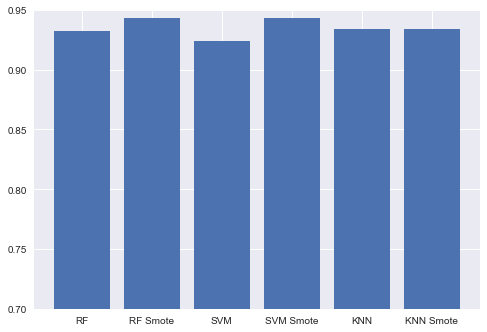

In [34]:
plt.bar(
    ['RF', 'RF Smote', 'SVM', 'SVM Smote', 'KNN', 'KNN Smote'],
    [results_RF_NoSmote, results_RF, results_SVM_NoSmote, results_SVM, results_KNN_NoSmote, results_KNN]
)
plt.ylim(.7, .95);

# Grid Searches

After some tests using the standard classifiers, we can get better results by using parameters that are specific to each one. To help us find the parameters that get the best output we used grid search for each algorithm, making changes in a selected set of parameters.

## Random Forest

In [35]:
if GRID_SEARCH:
    from sklearn.model_selection import GridSearchCV
    from imblearn.pipeline import Pipeline

    forest = RandomForestClassifier(random_state = 1)

    param_grid = { 
        'n_estimators': [100, 200, 500, 1000],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4, 5, 6, 7, 8, None],
        'criterion' :['gini', 'entropy']
    }

    sss = StratifiedShuffleSplit(n_splits = 4 , test_size=0.5, random_state=0)

    gridF_RF = GridSearchCV(forest, param_grid=param_grid, cv = sss, verbose = 4, n_jobs=-1)

    bestF_RF = gridF_RF.fit(inputs, labels)

    f = open(F_GRID_DIR + 'rf_output.txt', 'w')
    f.write(gridF_RF.best_score_)
    f.write('\n')
    f.write(gridF_RF.best_estimator_)
    f.write('\n')
    f.close()

    print(gridF_RF.best_score_)
    print(gridF_RF.best_estimator_)
else:
    f = open(F_GRID_DIR + 'rf_output.txt', 'r')
    print(f.readlines())
    f.close()


['Fitting 4 folds for each of 144 candidates, totalling 576 fits\n', '0.9313335132946416\n', 'RandomForestClassifier(max_depth=5, random_state=1)\n']


From this random forest grid search we found out that the best parameters to give our random forest classifier are max_depth=5 or max_depth=6 (both were accepted in various tests), n_estimators=200 and random_state=1.

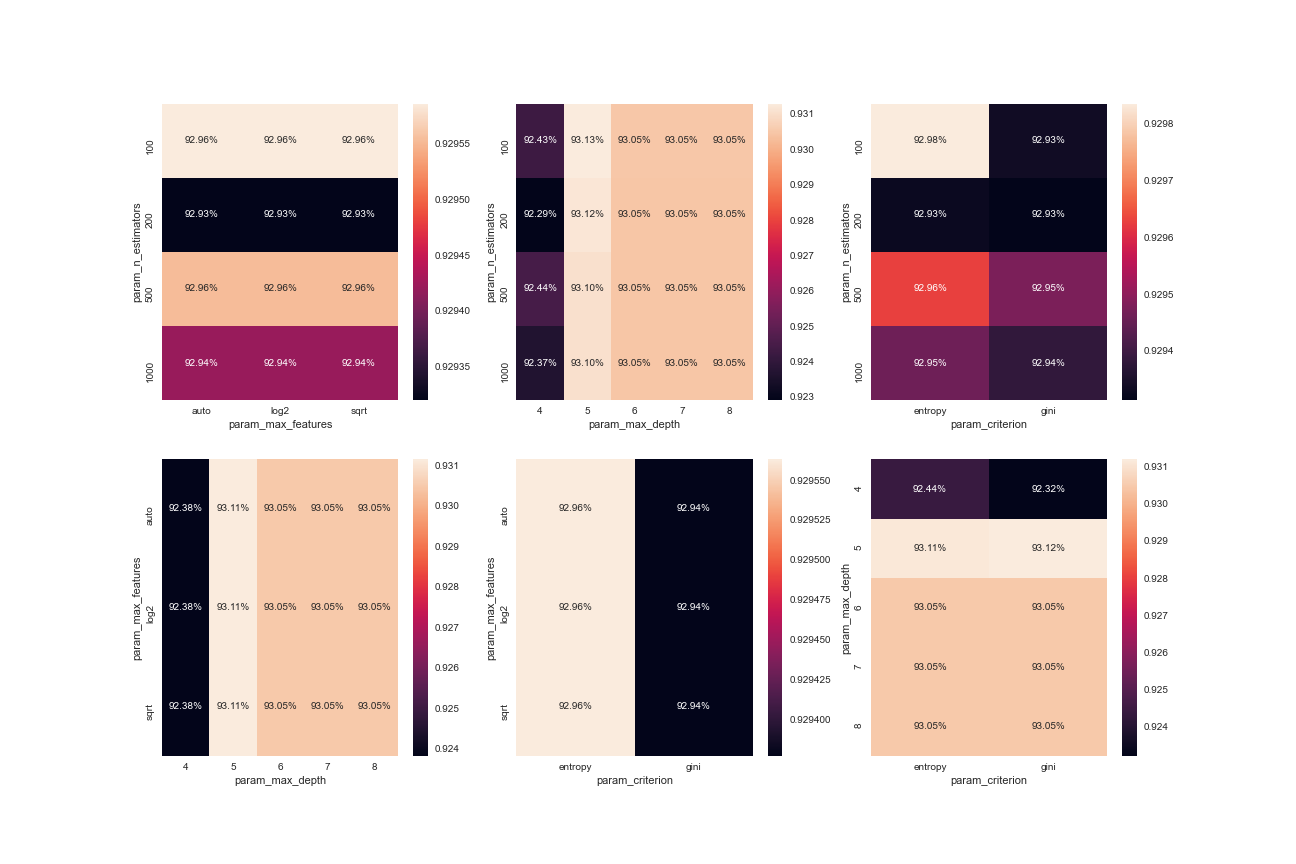

In [36]:
if GRID_SEARCH:
    import seaborn as sb

    fig, axs = plt.subplots(2, 3, figsize=(18, 12))

    pvt = pd.pivot_table(pd.DataFrame(gridF_RF.cv_results_), values='mean_test_score', index='param_n_estimators', columns='param_max_features')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0][0])

    pvt = pd.pivot_table(pd.DataFrame(gridF_RF.cv_results_), values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0][1])

    pvt = pd.pivot_table(pd.DataFrame(gridF_RF.cv_results_), values='mean_test_score', index='param_n_estimators', columns='param_criterion')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0][2])

    pvt = pd.pivot_table(pd.DataFrame(gridF_RF.cv_results_), values='mean_test_score', index='param_max_features', columns='param_max_depth')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1][0])

    pvt = pd.pivot_table(pd.DataFrame(gridF_RF.cv_results_), values='mean_test_score', index='param_max_features', columns='param_criterion')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1][1])

    pvt = pd.pivot_table(pd.DataFrame(gridF_RF.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_criterion')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1][2])

    fig.savefig(F_GRID_DIR + 'rf_param_heatmap.png')
else:
    display(Image(filename=F_GRID_DIR + 'rf_param_heatmap.png'))

## SVM

In [37]:
if GRID_SEARCH:
    from sklearn.model_selection import GridSearchCV

    clf = svm.SVC()

    param_grid = {
        'C': [1, 10, 100], 
        'gamma': [1, 0.1, 0.01, 'auto'],
        'kernel': ['rbf','sigmoid']
    }

    sss = StratifiedShuffleSplit(n_splits = 4 , test_size=0.5, random_state=0)

    gridF_SVM = GridSearchCV(clf, param_grid=param_grid, cv = sss, verbose = 4, n_jobs=-1)

    bestF_SVM = gridF_SVM.fit(inputs, labels)

    f = open(F_GRID_DIR + 'svm_output.txt', 'w')
    f.write(gridF_SVM.best_score_)
    f.write('\n')
    f.write(gridF_SVM.best_estimator_)
    f.write('\n')
    f.close()

    print(gridF_SVM.best_score_)
    print(gridF_SVM.best_estimator_)
else:asd
    f = open(F_GRID_DIR + 'svm_output.txt', 'r')
    print(f.readlines())
    f.close()

IndentationError: unexpected indent (<ipython-input-37-d090e549127a>, line 28)

From this SVM grid search we found out that the best parameters to give our random forest classifier are C=100, gamma=0.1 and kernel='sigmoid'.

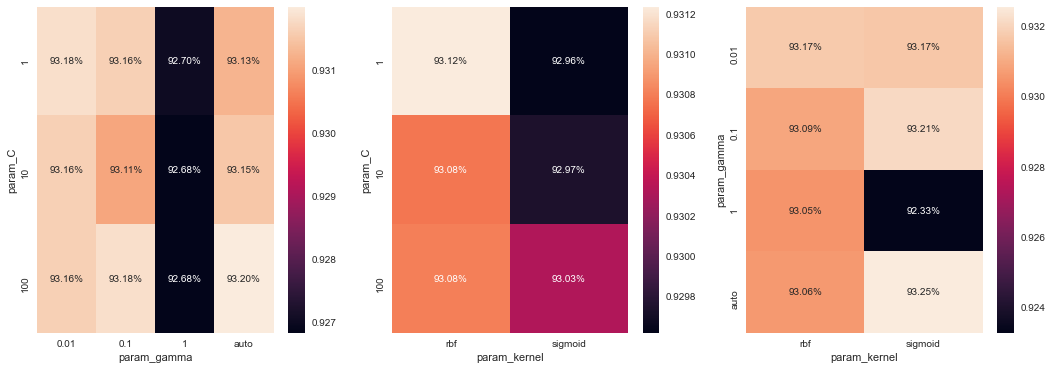

In [60]:
if GRID_SEARCH:
    import seaborn as sb

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    pvt = pd.pivot_table(pd.DataFrame(gridF_SVM.cv_results_), values='mean_test_score', index='param_C', columns='param_gamma')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0])

    pvt = pd.pivot_table(pd.DataFrame(gridF_SVM.cv_results_), values='mean_test_score', index='param_C', columns='param_kernel')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1])

    pvt = pd.pivot_table(pd.DataFrame(gridF_SVM.cv_results_), values='mean_test_score', index='param_gamma', columns='param_kernel')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[2])

    fig.savefig(F_GRID_DIR + 'svm_param_heatmap.png')
else:
    display(Image(filename=F_GRID_DIR + 'svm_param_heatmap.png'))

## KNN

In [39]:
if GRID_SEARCH:
    from sklearn.model_selection import GridSearchCV

    neigh = KNeighborsClassifier()

    param_grid =  {
        'n_neighbors': [1, 5, 10, 100, math.floor(math.sqrt(len(inputs)/2))], 
        'weights': ['uniform', 'distance'],
        'leaf_size': [1, 10, 30, 100],
        'algorithm': ['auto','ball_tree', 'kd_tree', 'brute']
    }

    sss = StratifiedShuffleSplit(n_splits = 4 , test_size=0.5, random_state=0)

    gridF_KNN = GridSearchCV(neigh, param_grid=param_grid, cv = sss, verbose = 4, n_jobs=-1)

    bestF_KNN = gridF_KNN.fit(inputs, labels)

   
    f = open(F_GRID_DIR + 'knn_output.txt', 'w')
    f.write(gridF_KNN.best_score_)
    f.write('\n')
    f.write(gridF_KNN.best_estimator_)
    f.write('\n')
    f.close()

    print(gridF_KNN.best_score_)
    print(gridF_KNN.best_estimator_)
else:
    f = open(F_GRID_DIR + 'knn_output.txt', 'r')
    print(f.readlines())
    f.close()

Fitting 4 folds for each of 160 candidates, totalling 640 fits
0.9328969271606604
KNeighborsClassifier(n_neighbors=10)


From this KNN grid search we found out that the best parameters to give our random forest classifier are leaf_size=1 and n_neighbors=10.

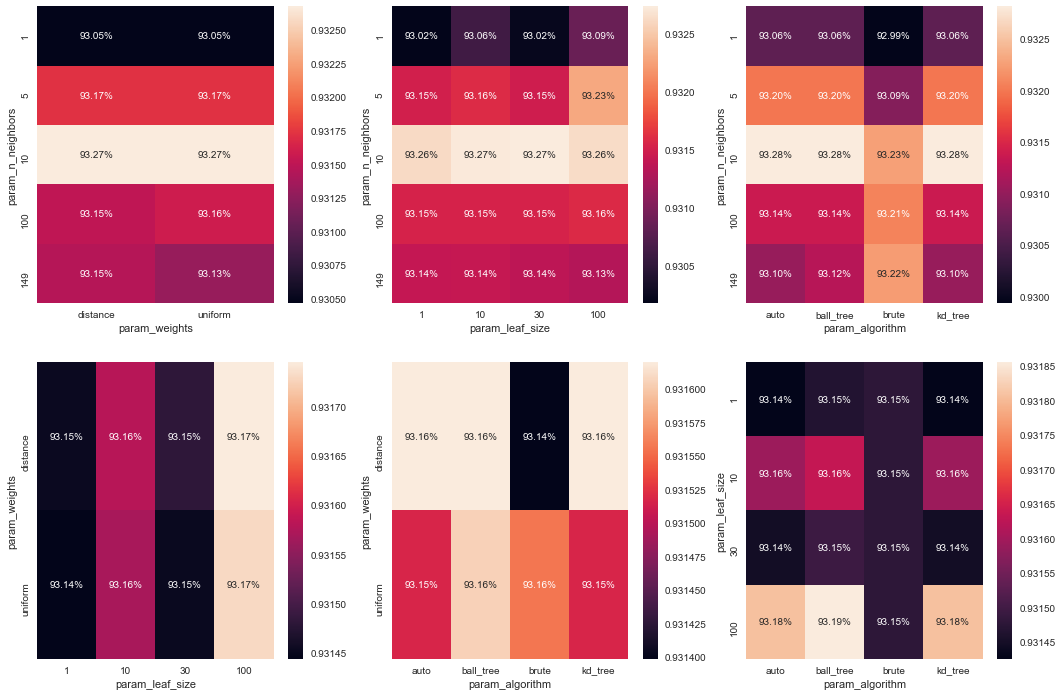

In [62]:
if GRID_SEARCH:
    import seaborn as sb

    fig, axs = plt.subplots(2, 3, figsize=(18, 12))

    pvt = pd.pivot_table(pd.DataFrame(gridF_KNN.cv_results_), values='mean_test_score', index='param_n_neighbors', columns='param_weights')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0][0])

    pvt = pd.pivot_table(pd.DataFrame(gridF_KNN.cv_results_), values='mean_test_score', index='param_n_neighbors', columns='param_leaf_size')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0][1])

    pvt = pd.pivot_table(pd.DataFrame(gridF_KNN.cv_results_), values='mean_test_score', index='param_n_neighbors', columns='param_algorithm')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[0][2])

    pvt = pd.pivot_table(pd.DataFrame(gridF_KNN.cv_results_), values='mean_test_score', index='param_weights', columns='param_leaf_size')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1][0])

    pvt = pd.pivot_table(pd.DataFrame(gridF_KNN.cv_results_), values='mean_test_score', index='param_weights', columns='param_algorithm')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1][1])

    pvt = pd.pivot_table(pd.DataFrame(gridF_KNN.cv_results_), values='mean_test_score', index='param_leaf_size', columns='param_algorithm')
    sb.heatmap(pvt, annot=True, fmt='.2%', ax=axs[1][2])

    fig.savefig(F_GRID_DIR + 'knn_param_heatmap.png')
else:
    display(Image(filename=F_GRID_DIR + 'knn_param_heatmap.png'))

# Comparing Grid Search Results

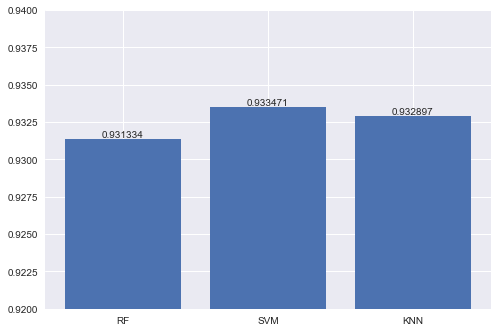

In [53]:
if GRID_SEARCH:
    df = pd.DataFrame({
        'lab':['RF', 'SVM', 'KNN'],
        'val':[gridF_RF.best_score_, gridF_SVM.best_score_, gridF_KNN.best_score_]
    })
    fig, ax = plt.subplots()
    bar_info = ax.bar(['RF', 'SVM', 'KNN'], [gridF_RF.best_score_, gridF_SVM.best_score_, gridF_KNN.best_score_])
    ax.bar_label(bar_info)
    ax.set_ylim(.92,.94)
    fig.savefig(F_GRID_DIR + 'grid_search_values.png')
else:
    display(Image(filename=F_GRID_DIR + 'grid_search_values.png'))

From this graph we can see that SVM works the best for the way we handled our dataset.

# Cross-Validation  
In this section we are taking the results from the grid search of each algorithm and using them to create classifiers. The classifiers will be used to cross validate our data set in order to detect if we have any overfit after all the alterations to the data.

## Random Forest

In [41]:
from sklearn.model_selection import cross_val_score

random_forest_classifier = RandomForestClassifier(max_depth=6, n_estimators=200, random_state=1)
scores = cross_val_score(random_forest_classifier, inputs, labels, cv=5, scoring='f1_weighted')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 f1 score with a standard deviation of 0.00


## SVM


In [42]:
clf = svm.SVC(C=100, gamma=0.1, kernel='sigmoid')
scores = cross_val_score(clf, inputs, labels, cv=5, scoring='f1_weighted')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 f1 score with a standard deviation of 0.00


## KNN

In [43]:
neigh = KNeighborsClassifier(leaf_size=1, n_neighbors=10)
scores = cross_val_score(neigh, inputs, labels, cv=5, scoring='f1_weighted')

print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 f1 score with a standard deviation of 0.00


Since all cross validations got a simmilar score to the simple prediciton and a standard deviation of 0.00 we can assume we have no overfit in our dataset.